# Fiber Learning Model Demo

This notebook demonstrates fiber learning with generative models on small FIFs trained on EMNIST.<br>
First we train a subject model from which we want to learn the fibers from.<br>
Next we train a dimensions reducing VAE that should be lossless and provide a more dense latent space in which the fiber learning model is operating.<br>
Lastly we train the fiber learning model on the resulting representations of the subject model in the latent space of the VAE.

In [1]:
import os
os.chdir(os.path.expanduser('~/FFF/'))
import fff
import yaml
import lightning_trainable
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os
import pickle as pkl
import umap
from pathlib import Path
matplotlib.rcParams.update({'font.size': 18})
import gc         # garbage collect library
from pathlib import Path
import shutil

INFO: Using pytorch backend
/tmp/ipykernel_3749721/2018901583.py:10: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
save = False
plot_dir = "demo"
if save:
    Path(f"plots/{plot_dir}").mkdir(parents=True, exist_ok=True)

In [3]:
def plot_images_16(data, title, model, n_rows=2, n_columns=9, save=False, plot_dir="demo"):
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(2*n_columns, 2*n_rows))
    for i in range(n_rows):
        for j in range(n_columns):
            axes[i][j].imshow(data[i*n_columns +j].cpu().reshape(16, 16).T, cmap='gray', vmin=0, vmax=1)
            axes[i][j].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
            axes[i][j].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    fig.suptitle(title)
    if save:
        plt.savefig(f"plots/{plot_dir}/{model}/{title}.png", bbox_inches='tight')

## Subject Model

First we train a small FIF with 5-dimensional bottleneck on the digit split of EMNIST.

In [4]:
hparams_sm_five = fff.fif.FreeFormInjectiveFlowHParams(
    noise= 0.05,
    data_set= {"name": "mnist_ds", "root": "data", "conditional": False},
    loss_weights= {"noisy_reconstruction": 100, "z_reconstruction_encoder": 10, "nll": 1},
    train_models= True,
    models= [{
        "name": "fff.model.ConvolutionalNeuralNetwork",
        "latent_dim": 100,
        "ch_factor": 32,
        "encoder_spec": [
            [2,4,2,1],
            [4,4,2,1],
            [8,4,2,1]],
        "decoder_spec": [
            [8,4],
            [4,4,2,1],
            [1,3,2,1,1]
        ]},
        {"name": "fff.model.ResNet",
         "latent_dim": 5,
         "dropout": 0.5,
         "layers_spec": [
             [32,32],
             [32,32]]}
    ],
    optimizer= {
        "name": "adam",
        "lr": 0.0005,
        "weight_decay": 0.01,
    },
    max_epochs= 22,
    batch_size= 512)

In [23]:
subject_model = fff.fif.FreeFormInjectiveFlow(hparams_sm_five)

torch.Size([240000, 1, 16, 16])
cond_dim:  0
latent_dim:  5


In [21]:
subject_model.fit(logger_kwargs=dict(name="fif_5d", save_dir="subject_models"))

INFO: GPU available: True (cuda), used: True
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO: IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO: HPU available: False, using: 0 HPUs
INFO: The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint
INFO: The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7,8]
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7,8]
INFO: 
  | Name   | Type       | Params
--------------------------------------
0 | models | Sequential | 1.7 M 
--------------------------------------
1.7 M     Trainable params
0         Non-trainable params
1.7 M     Total

Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=22` reached.
INFO: `Trainer.fit` stopped: `max_epochs=22` reached.


{'training/z 1D-Wasserstein-1': 0.12992659211158752,
 'training/z std': 0.8389440774917603,
 'training/loss': 256.16522216796875,
 'training/nll': 1.6729347705841064,
 'training/reconstruction': 2.3982605934143066,
 'training/noisy_reconstruction': 2.5357160568237305,
 'training/sqr_reconstruction': 7.110854148864746,
 'training/z_reconstruction_encoder': 0.09206946939229965,
 'validation/z 1D-Wasserstein-1': 0.13599000871181488,
 'validation/z std': 0.1878528743982315,
 'validation/loss': 259.0296325683594,
 'validation/nll': 14.351337432861328,
 'validation/vol_change_encoder': -4.4215617179870605,
 'validation/vol_change_decoder': -8.083951950073242,
 'validation/nll_encoder': 10.688948631286621,
 'validation/nll_decoder': 14.351337432861328,
 'validation/reconstruction': 2.286356210708618,
 'validation/noisy_reconstruction': 2.4374163150787354,
 'validation/sqr_reconstruction': 6.614408016204834,
 'validation/masked_reconstruction': 5.526745796203613,
 'validation/z_reconstruction_

In [5]:
checkpoint = lightning_trainable.utils.find_checkpoint(root="subject_models/fif_5d", version=2, epoch="last")
subject_model = fff.fif.FreeFormInjectiveFlow.load_from_checkpoint(checkpoint)

torch.Size([240000, 1, 16, 16])
cond_dim:  0
latent_dim:  5


In [6]:
torch.set_grad_enabled(False)

In [7]:
def save_and_plot_data(rectangular_flow):
    train_data = rectangular_flow.train_data[:]
    val_data = rectangular_flow.val_data[:]
    test_data = rectangular_flow.test_data[:]
    
    conditioned = rectangular_flow.apply_conditions(train_data)
    train_samples = conditioned.x0
    c_t = conditioned.condition
    
    conditioned = rectangular_flow.apply_conditions(val_data)
    val_samples = conditioned.x0
    c_v = conditioned.condition

    conditioned = rectangular_flow.apply_conditions(test_data)
    test_samples = conditioned.x0
    c_test = conditioned.condition
    
    device = rectangular_flow.device
    print("encoding traindata...")
    batch_size = rectangular_flow.hparams.batch_size
    z_train = torch.cat([
        rectangular_flow.encode(batch.to(device), c_batch.to(device)).cpu()
        for batch, c_batch in zip(train_samples.split(batch_size), c_t.split(batch_size))
    ])
    print("encoding valdata...")
    z_val = torch.cat([
        rectangular_flow.encode(batch.to(device), c_batch.to(device)).cpu()
        for batch, c_batch in zip(val_samples.split(batch_size), c_v.split(batch_size))
    ])
    print("encoding testdata...")
    z_test = torch.cat([
        rectangular_flow.encode(batch.to(device), c_batch.to(device)).cpu()
        for batch, c_batch in zip(test_samples.split(batch_size), c_test.split(batch_size))
    ])

    print("save data...")
    data = {}
    
    data["train_x"] = train_samples.cpu().numpy()
    data["train_y"] = z_train.cpu().numpy()
    center = torch.mean(z_train)
    std = torch.std(z_train)
    
    data["val_x"] = val_samples.cpu().numpy()
    data["val_y"] = z_val.cpu().numpy()

    data["test_x"] = test_samples.cpu().numpy()
    data["test_y"] = z_test.cpu().numpy()

    
    path = "data/"
    fileName = path + "16EMNIST_F5F_demo"
    fileObject = open(fileName, 'wb')
    
    pkl.dump(data, fileObject)
    fileObject.close()

    print("evaluate model...")
    print("reconstructing...")
    reconstruction1 = torch.cat([
        rectangular_flow.decode(batch.to(device), c_batch.to(device)).cpu()
        for batch, c_batch in zip(z_test.split(batch_size), c_test.split(batch_size))
    ])
   
    print("sampling...")
    z_sampled = torch.randn_like(z_test)
    x_sampled = torch.cat([
        rectangular_flow.decode(batch.to(device), c_batch.to(device)).detach().cpu()
        for batch, c_batch in zip(z_sampled.split(batch_size), c_test.split(batch_size))
    ])
    plot_images_16(test_samples, "Original", "subject_model")
    plot_images_16(reconstruction1, "Reconstruction", "subject_model")
    plot_images_16(x_sampled, "Samples", "subject_model")
    return data["test_y"]

encoding traindata...
encoding valdata...
encoding testdata...
save data...
evaluate model...
reconstructing...
sampling...


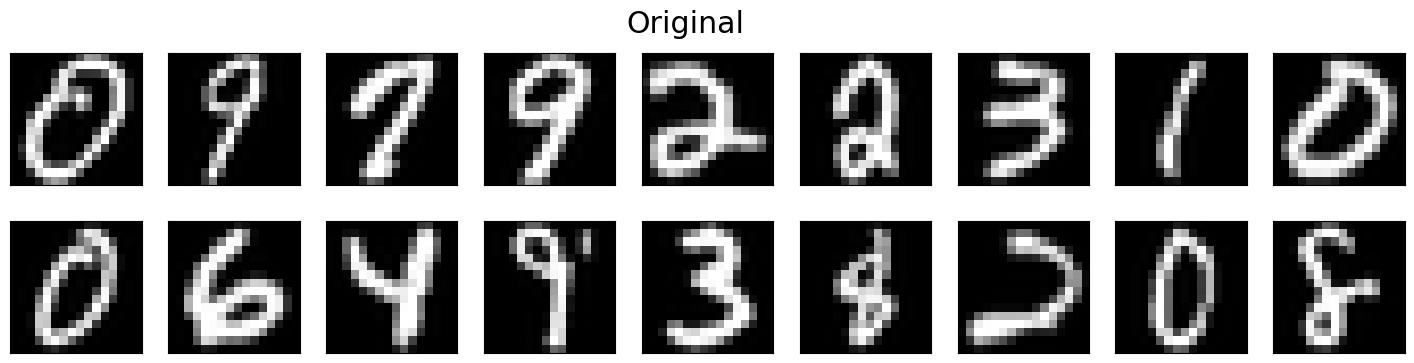

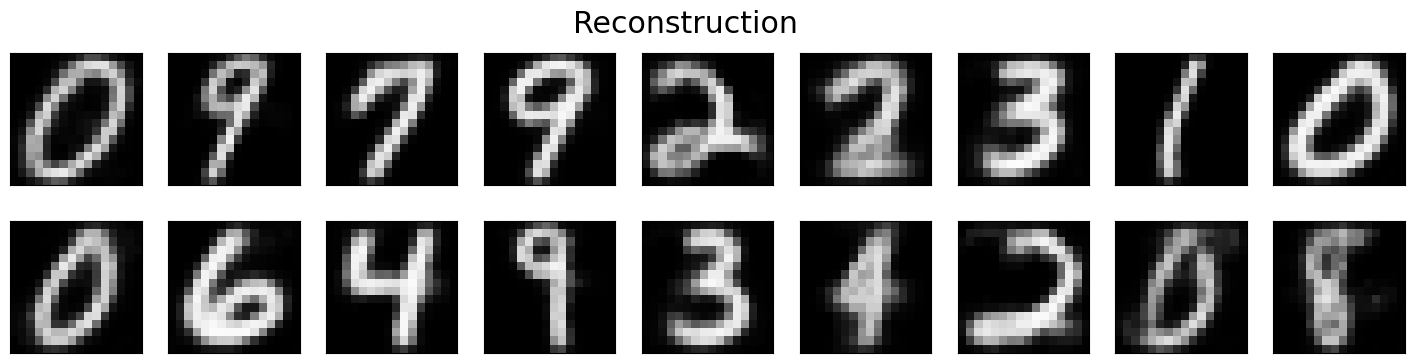

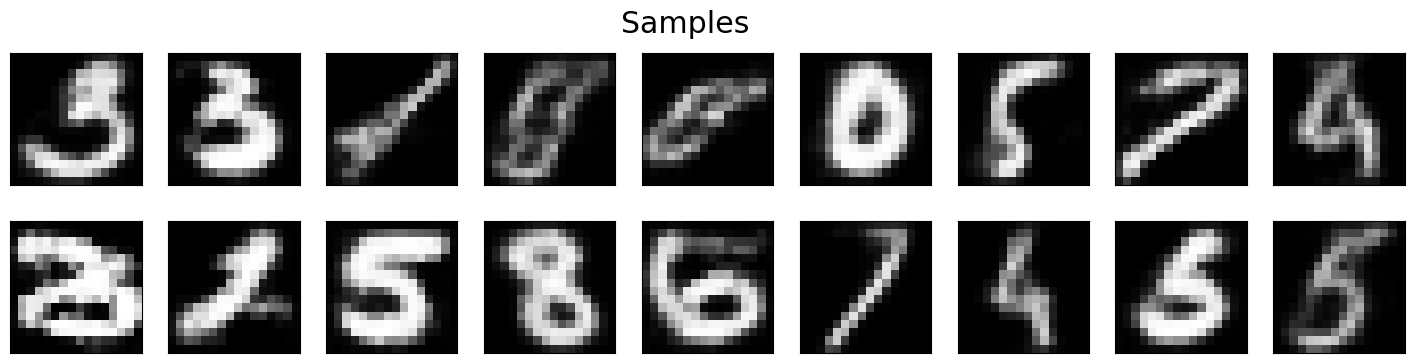

In [8]:
test_data_representation = save_and_plot_data(subject_model)

In [9]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(test_data_representation)

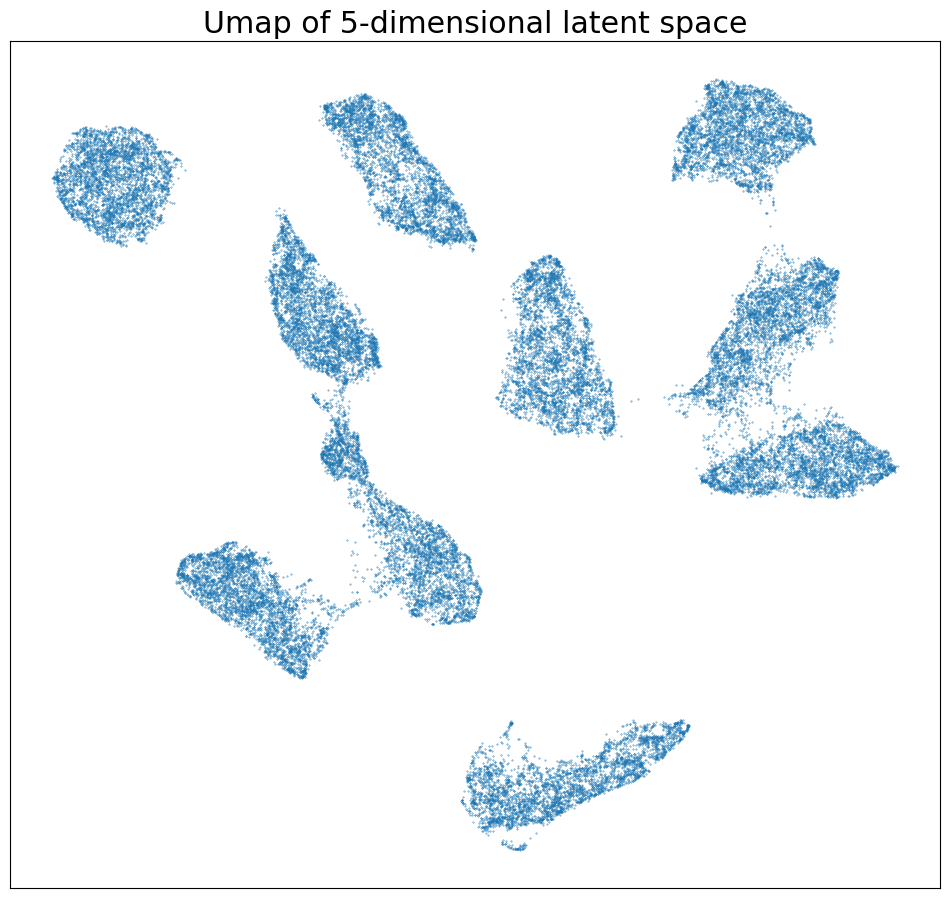

In [10]:
plt.figure(figsize=[12,11])
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s=0.1
)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.title("Umap of 5-dimensional latent space")
if save:
    plt.savefig(f"plots/{plot_dir}/subject_model/UMAP.png", bbox_inches='tight')

In [11]:
subject_model.to("cpu")

FreeFormInjectiveFlow(
  (models): Sequential(
    (0): ConvolutionalNeuralNetwork(
      (model): Sequential(
        (encoder): Sequential(
          (0): Unflatten(dim=-1, unflattened_size=(1, 16, 16))
          (1): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
          (2): ReLU()
          (3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
          (4): ReLU()
          (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
          (6): ReLU()
          (7): Flatten(start_dim=-3, end_dim=-1)
          (8): Linear(in_features=1024, out_features=100, bias=True)
        )
        (decoder): Sequential(
          (0): Linear(in_features=100, out_features=4096, bias=True)
          (1): Unflatten(dim=-1, unflattened_size=(256, 4, 4))
          (2): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
          (3): ReLU()
          (4): ConvTranspose2d(128, 1, kernel_size=(3, 3), stride=(2, 2), paddi

## Train Lossless VAE for the latent space

In [11]:
hparams_vae = fff.fif.FreeFormInjectiveFlowHParams(
    vae = True,
    eval_all = False,
    noise = 0.01,
    data_set = {"name": "mnist_ds", "root": "data", "conditional": False},
    loss_weights = {"kl": 1, "noisy_reconstruction": 1000},
    train_models = True,
    models = [{
        "name": "fff.model.ConvolutionalNeuralNetwork",
        "latent_dim": 100,
        "ch_factor": 32,
        "encoder_spec": [
            [2,4,2,1],
            [4,4,2,1],
            [8,4,2,1]],
        "decoder_spec": [
            [8,4],
            [4,4,2,1],
            [1,3,2,1,1]
        ]},
        {"name": "fff.model.VarResNet",
         "latent_dim": 64,
         "layers_spec": [
             [512,512],
             [512,512]]}
    ],
    optimizer = {
        "name": "Adam",
        "lr": 0.0005,
        "weight_decay": 0.01,
    },
    max_epochs = 650,
    batch_size = 512)

In [12]:
VAE = fff.fif.FreeFormInjectiveFlow(hparams_vae)

torch.Size([240000, 1, 16, 16])
cond_dim:  0
latent_dim:  64


In [15]:
torch.set_grad_enabled(True)
VAE.fit(logger_kwargs=dict(name="vae", save_dir="lossless_ae"))

INFO: GPU available: True (cuda), used: True
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO: IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO: HPU available: False, using: 0 HPUs
INFO: The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint
INFO: The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7,8]
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7,8]
INFO: 
  | Name         | Type       | Params
--------------------------------------------
0 | models       | Sequential | 3.2 M 
  | other params | n/a        | 1     
--------------------------------------------
3.2 M     

Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

{'training/z 1D-Wasserstein-1': 0.16312101483345032,
 'training/z std': 1.1824193000793457,
 'training/loss': 1537.713134765625,
 'training/kl': 191.52838134765625,
 'training/reconstruction': 1.327446699142456,
 'training/noisy_reconstruction': 1.3461848497390747,
 'training/sqr_reconstruction': 1.3828396797180176}

In [12]:
checkpoint = lightning_trainable.utils.find_checkpoint(root="lossless_ae/vae_old", version=0, epoch="last")
VAE = fff.fif.FreeFormInjectiveFlow.load_from_checkpoint(checkpoint)

torch.Size([240000, 1, 16, 16])
cond_dim:  0
latent_dim:  64


In [13]:
def eval_vae(model2plt):
    device = model2plt.device
    
    data = {}
    true_test_batch = model2plt.test_data[:]
    test_conditioned = model2plt.apply_conditions(true_test_batch)
    true_test_c = test_conditioned.condition
    true_test_samples = test_conditioned.x_noisy
    
    print("encoding...")
    batch_size = model2plt.hparams.batch_size
    true_test_z = torch.cat([
        model2plt.encode(batch.to(device), c_batch.to(device))[0].cpu()
        for batch, c_batch in zip(true_test_samples.split(batch_size), true_test_c.split(batch_size))
    ])
    
    print("reconstructing...")
    true_reconstruction = torch.cat([
        model2plt.decode(batch.to(device), c_batch.to(device)).cpu()
        for batch, c_batch in zip(true_test_z.split(batch_size), true_test_c.split(batch_size))
    ])

    print("sampling...")
    z_sampled = torch.randn_like(true_test_z)
    x_sampled = torch.cat([
        model2plt.decode(batch.to(device), c_batch.to(device)).detach().cpu()
        for batch, c_batch in zip(z_sampled.split(batch_size), true_test_c.split(batch_size))
    ])
    
    #plotting...
    plot_images_16(true_test_samples, "Original", "vae")
    plot_images_16(true_reconstruction, "Reconstruction", "vae")
    plot_images_16(x_sampled, "Sampled", "vae")

encoding...
reconstructing...
sampling...


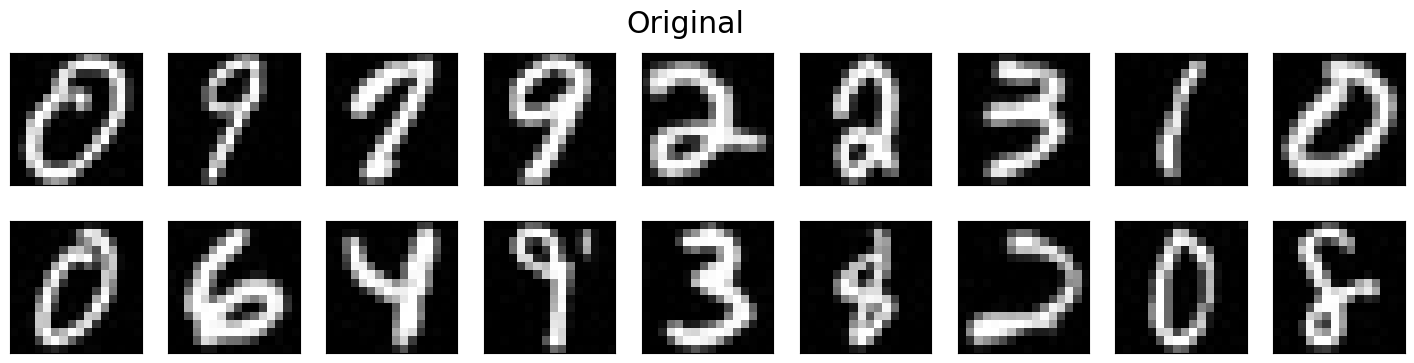

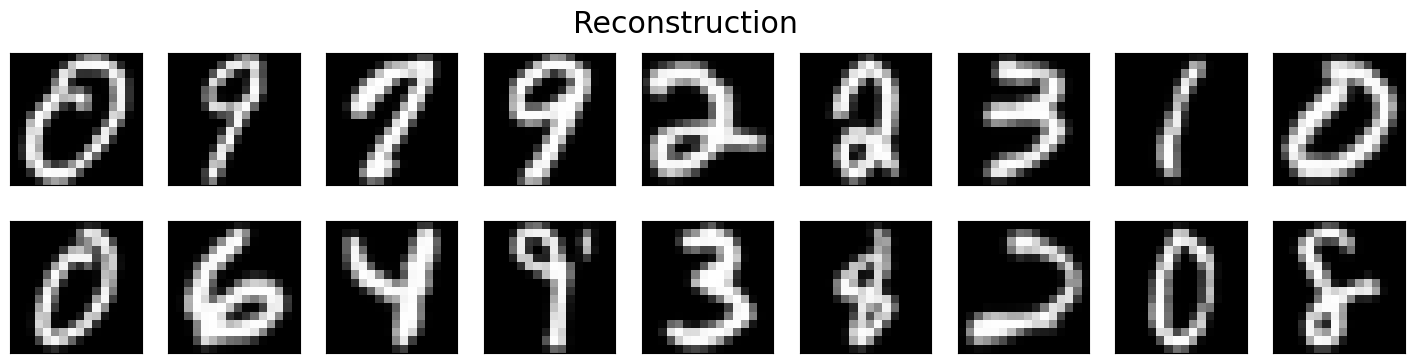

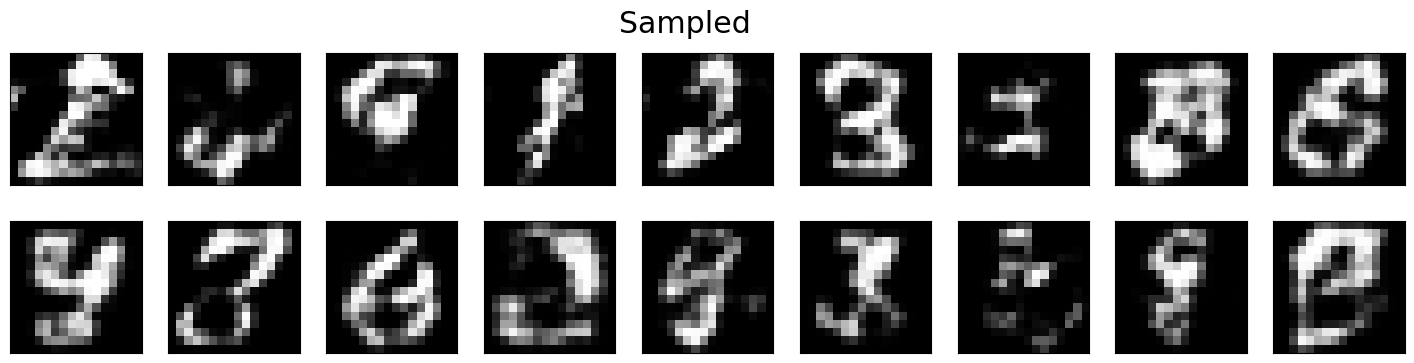

In [14]:
torch.set_grad_enabled(False)
eval_vae(VAE)

In [15]:
VAE.to("cpu")

FreeFormInjectiveFlow(
  (models): Sequential(
    (0): ConvolutionalNeuralNetwork(
      (model): Sequential(
        (encoder): Sequential(
          (0): Unflatten(dim=-1, unflattened_size=(1, 16, 16))
          (1): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
          (2): ReLU()
          (3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
          (4): ReLU()
          (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
          (6): ReLU()
          (7): Flatten(start_dim=-3, end_dim=-1)
          (8): Linear(in_features=1024, out_features=100, bias=True)
        )
        (decoder): Sequential(
          (0): Linear(in_features=100, out_features=4096, bias=True)
          (1): Unflatten(dim=-1, unflattened_size=(256, 4, 4))
          (2): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
          (3): ReLU()
          (4): ConvTranspose2d(128, 1, kernel_size=(3, 3), stride=(2, 2), paddi

## Train fiber-learning model

In [19]:
hparams_fl_fif = fff.fif.FreeFormInjectiveFlowHParams(
    vae = True,
    noise = 0.01,
    latent_distribution = {"name": "transformed_normal"},
    data_set = {"name": "mnist_split", "root": "data", "conditional": True, "path": "16EMNIST_F5F_demo"},
    loss_weights = {"nll": 1, "latent_reconstruction": 10, "masked_reconstruction": 1, "fiber_loss": 1},
    train_models = False,
    train_transform = True,
    models = [{
        "name": "fff.model.ConvolutionalNeuralNetwork",
        "latent_dim": 100,
        "ch_factor": 32,
        "encoder_spec": [
            [2,4,2,1],
            [4,4,2,1],
            [8,4,2,1]],
        "decoder_spec": [
            [8,4],
            [4,4,2,1],
            [1,3,2,1,1]
        ]},
        {"name": "fff.model.VarResNet",
         "latent_dim": 64,
         "layers_spec": [
             [512,512],
             [512,512]]}
    ],
    load_models_path = "lossless_ae/vae_old/version_0/checkpoints/last.ckpt",
    transform = {
        "name": "fff.model.ResNet",
        "data_dim": 100,
        "latent_dim": 64-5,
        "layers_spec": [
            [512, 512],
            [512, 512],
            [512, 512]]},
    optimizer = {
        "name": "adam",
        "lr": 0.01,
    },
    lr_scheduler = "onecyclelr",
    max_epochs = 200,
    batch_size = 512,
    subject_model_path = "fif_5d/version_2")

In [17]:
model = fff.fif.FreeFormInjectiveFlow(hparams_fl_fif)

torch.Size([5000, 256])
cond_dim:  0
latent_dim:  64
load models checkpoint
Only the transform_model will be trained while the model is kept fixed!
Also the noise is added only to the latent variables!
cond_dim:  5
latent_dim:  59
loading subject_model
torch.Size([240000, 1, 16, 16])
cond_dim:  0
latent_dim:  5


In [18]:
torch.set_grad_enabled(True)
model.fit(logger_kwargs=dict(name="fif", save_dir="lightning_logs"))

INFO: GPU available: True (cuda), used: True
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO: IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO: HPU available: False, using: 0 HPUs
INFO: The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint
INFO: The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [8]
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [8]
INFO: 
  | Name            | Type                  | Params
----------------------------------------------------------
0 | models          | Sequential            | 3.2 M 
1 | transform_model | ResNet                | 2.0 M 
2 | subject_model   | FreeFormI

Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

/export/home/wjoran/miniconda3/envs/py11/lib/python3.11/site-packages/lightning/pytorch/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


{'training/z 1D-Wasserstein-1': 28.320465087890625,
 'training/z std': 53.152679443359375,
 'training/loss': 135618.328125,
 'training/nll': 71003.515625,
 'training/latent_reconstruction': 6460.2431640625,
 'training/masked_reconstruction': 11.027247428894043,
 'training/fiber_loss': 1.3508151769638062,
 'training/z_sample_reconstruction': 12011.38671875,
 'validation/z 1D-Wasserstein-1': 28.623071670532227,
 'validation/z std': 51.905460357666016,
 'validation/loss': 295182.9375,
 'validation/nll': 203941.71875,
 'validation/vol_change_encoder': 8.31784725189209,
 'validation/vol_change_decoder': -9.261749267578125,
 'validation/nll_encoder': 203924.15625,
 'validation/nll_decoder': 203941.71875,
 'validation/latent_reconstruction': 9122.8916015625,
 'validation/reconstruction': 0.29868850111961365,
 'validation/noisy_reconstruction': 0.29868850111961365,
 'validation/sqr_reconstruction': 0.10475953668355942,
 'validation/masked_reconstruction': 10.892009735107422,
 'validation/z_rec

In [ ]:
def evaluate_model(model2plt):
    device = model2plt.device
    
    data = {}
    train_batch = model2plt.train_data[:]
    test_batch = model2plt.test_data[:]

    train_conditioned = model2plt.apply_conditions(train_batch)
    train_samples = train_conditioned.x_noisy
    train_c = train_conditioned.condition
    train_c0 = torch.empty((train_samples.shape[0], 0), device=train_samples.device, dtype=train_samples.dtype)
    
    test_conditioned = model2plt.apply_conditions(test_batch)
    test_c = test_conditioned.condition
    test_samples = test_conditioned.x0
    test_c0 = torch.empty((test_samples.shape[0], 0), device=test_samples.device, dtype=test_samples.dtype)
    
    data["train_samples"] = train_samples
    data["test_samples"] = test_samples
    data["test_c"] = test_c
    data["train_c"] = train_c
    
    print("sampling...")
    x_sampled = model2plt.sample((test_samples[:].shape[0],),test_c[:].to(device))
    
    c_sm = torch.empty((test_c.shape[0], 0), device=test_c.device)
    conditioned = subject_model.apply_conditions((x_sampled,))
    c_sm = conditioned.condition
    x_sm = conditioned.x0
    xc = subject_model.encode(x_sm.to(subject_model.device), c_sm.to(subject_model.device))
    xc = (xc.detach().cpu() - center) / std
    latent_dim = xc[0].shape[0]
    delta_coarse = torch.sqrt(torch.sum((xc-test_c[:])**2, dim=1)/latent_dim)
    print("median fiber deviation on test set: ", torch.median(delta_coarse))
    
    return data

In [ ]:
data = evaluate_model(model)
if model.transform == "diffusion":
    z_dim = 64
    std_z0 = 1
else:
    z_dim = 64-5
    std_z0 = 1
latent_dim = max(1, data["test_c"].shape[1])

In [ ]:
def plot_details(model2plot, data, i_sample, zrange, GD_steps=100, sanity=False):
    device = model2plot.device
    
    pos_min, pos_max = -zrange, zrange
    c = data["test_c"]
    train_c = data["train_c"]
    train_samples = data["train_samples"]
    test_samples = data["test_samples"]
    N = 21
    n = 7
    ddim = z_dim
    x_orig = test_samples[i_sample]

    # calculate x_c_x
    if classifier:
        conditioned = subject_model.apply_conditions((train_samples,torch.zeros((train_samples.shape[0],0),device=test_samples.device)))
    else:
        conditioned = sm.apply_conditions((train_samples,))
    c_sm = conditioned.condition
    x_sm = conditioned.x0
    y_sm = torch.cat([
        subject_model.encode(batch.to(device), c_batch.to(device)).detach().cpu()
        for batch, c_batch in zip(x_sm.split(512), c_sm.split(512))
    ])
    train_c_sm = (y_sm  - center) / std
    # calculate x_c_x
    conditioned = subject_model.apply_conditions((test_samples,))
    c_sm = conditioned.condition
    x_sm = conditioned.x0
    y_sm = torch.cat([
        subject_model.encode(batch.to(device), c_batch.to(device)).detach().cpu()
        for batch, c_batch in zip(x_sm.split(512), c_sm.split(512))
    ])
    x_test_sm = subject_model.decode(y_sm.to(device), c_sm.to(subject_model.device)).detach().cpu()
    xcx = x_test_sm[i_sample]
    c_sm = (y_sm  - center) / std

    # calculate Nearest Neighbours
    verify = c_sm[i_sample]
    NN, similar, NN_suptitle, NN_titles = calc_NNs(verify, train_c_sm, train_samples, n+1)
    
    #calculate walk along 0th detail dimension with sampled rest
    z0_range = torch.linspace(pos_min, pos_max, N)
    #z0_sample = z[i_sample][0].numpy()

    #new_details_norm = torch.randn(40,N,ddim-1)
    new_details_norm = model2plot.get_latent("cpu").Dist.sample([40,N])[:,:,:-1]
    z0_range_norm = torch.unsqueeze(z0_range,0)
    z0_range_norm = z0_range_norm.repeat(40,1)
    new_details_norm = torch.cat([torch.unsqueeze(z0_range_norm,2), new_details_norm], dim=2)
    new_details_norm = torch.reshape(new_details_norm, (40*N,ddim))
    vz_dense = new_details_norm
    #print(torch.reshape(new_details_norm, (40,N,100))[0,:,0])
    
    #decoding...
    c_sample_sm = torch.unsqueeze(c_sm[i_sample], dim=0)
    c_sample = torch.unsqueeze(c[i_sample], dim=0)
    c_sample_norm = c_sample.repeat(40*N,1)
    c_sample_norm0 = torch.empty((c_sample_norm.shape[0], 0), dtype=c_sample.dtype)
    c_sample = c_sample_sm.repeat(N,1)

    if model2plot.transform == "diffusion":
        vz = model2plot.get_latent(device).sample((40*N,), c_sample_norm.to(device)).detach().cpu()
    else:
        vz = model2plot.transform_model.decode(new_details_norm.to(device), c_sample_norm.to(device)).detach().cpu()
    #vz = model2plot.get_latent(device).sample((40*N,), c_sample_norm.to(device)).detach().cpu()
    #vz = torch.randn_like(vz)
    if sanity==True:
        z_orig = model2plot.encode(test_samples[i_sample].to(device), torch.empty(0).to(device))[0].cpu()
        z_orig = z_orig + torch.randn_like(z_orig) * 0.01
        z_orig_rep = z_orig.repeat([40,1])
        vz = vz.reshape([40,N,-1])
        vz[0,1,:] = z_orig
        vz = vz.reshape([40*N,-1])
    vx = model2plot.decode(vz.to(device), c_sample_norm0.to(device)).detach().cpu()
    
    #plotting...
    D_plt_F = {"ind": i_sample, "mark_first": r"original $x$", "mark_second": sanity, "n": n+1, "save_name": "0v_x"}
    i_plot = np.arange(n) * N//n + 1
    D_plt_F["x_plot"] = torch.cat((x_orig.unsqueeze(0), vx[i_plot].detach().cpu()), dim=0)
    #D_plt_F["title_plot = torch.cat((torch.Tensor([z0_sample.item()]), (new_details_norm[i_plot,0]/std_z0)), dim=0)
    D_plt_F["suptitle"] = r"Learned fiber samples $\quad D(t^\dagger(v))$"
    D_plt_F["titles"] = [0,0,1,2,3,4,5,6,7,8,9]

    # calculate sms reconstructions
    vxc, D_plt_sm = plot_sm(subject_model, i_sample, vx, xcx, i_plot, n)
    D_plt_sm["mark_second"] = sanity

    res_pgd = None
    if GD_steps>0:
        # calc PGD and plot PGD
        vxpx, res_pgd, D_plt_PGD, D_plt_PGD_res = plot_PGD(i_sample, vz[i_plot], vx[i_plot], x_orig, c_sample_sm[0], n+1, GD_steps)
        D_plt_PGD["mark_second"] = sanity
        D_plt_PGD_res["mark_second"] = sanity
        # plot sm(x_PGD)
        _, D_plt_Psm = plot_sm(subject_model, i_sample, vxpx, xcx, range(n), n, name="PGD")
        D_plt_Psm["mark_second"] = sanity

    # plot check fiber
    title_fiber = f"{nums[i_sample]}-fiber deviation"
    plot_fiber_check(vxc, c_sample, NN, title_fiber, i_plot, res_pgd, N)

    paths = []
    paths.append(plot_images(**D_plt_F))
    paths.append(plot_images(**D_plt_sm))
    if GD_steps>0:
        paths.append(plot_images(**D_plt_PGD))
        paths.append(plot_images(**D_plt_PGD_res))
        paths.append(plot_images(**D_plt_Psm))

    # plot NNs
    NN_plot = torch.cat((x_orig.unsqueeze(0), similar), dim=0)
    paths.append(plot_images(i_sample, NN_plot, titles=NN_titles, suptitle=NN_suptitle, n=n+1, save_name="4NNs", mark_first= r"original $x$"))
    _, D_plt_NN = plot_sm(subject_model, i_sample, similar, xcx, range(n), n, name="NNs")
    paths.append(plot_images(**D_plt_NN))
    # calculate NNs of fiber samples
    paths_NNs = []
    for i in range(7):
        _, nns, NN_suptitle_i, NN_titles_i = calc_NNs(vxc[i_plot][i], train_c_sm, train_samples, n+1)
        NN_plot_i = torch.cat((vx[i_plot][i].detach().cpu().unsqueeze(0), nns), dim=0)
        paths_NNs.append(plot_images(i_sample, NN_plot_i, titles=NN_titles_i, suptitle=f"NNs of fiber sample {i}", n=n+1, save_name=f"6NNs{i}", mark_first= "fiber sample"))
    if save:
        out_path = f"plots/{plot_dir}/{nums[j]}_stacked.png"
        stack_images_vertically(paths, out_path)
        out_path_NN = f"plots/{plot_dir}/{nums[j]}_stackedNNs.png"
        stack_images_vertically(paths_NNs, out_path_NN)